In [67]:
import sys  
!{sys.executable} -m pip install tensorflow

In [68]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Load the MNIST dataset from Keras

In [69]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [70]:
print('Traing Samples:', len(x_train))
print('Test Samples:', len(x_test))

print('Shape of individual images:', x_train[0].shape)

Traing Samples: 60000
Test Samples: 10000
Shape of individual images: (28, 28)


In [71]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

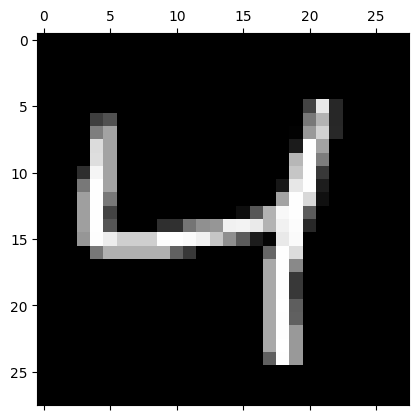

In [72]:
plt.matshow(x_train[2], cmap = 'gray')

In [73]:
y_train[2]

4

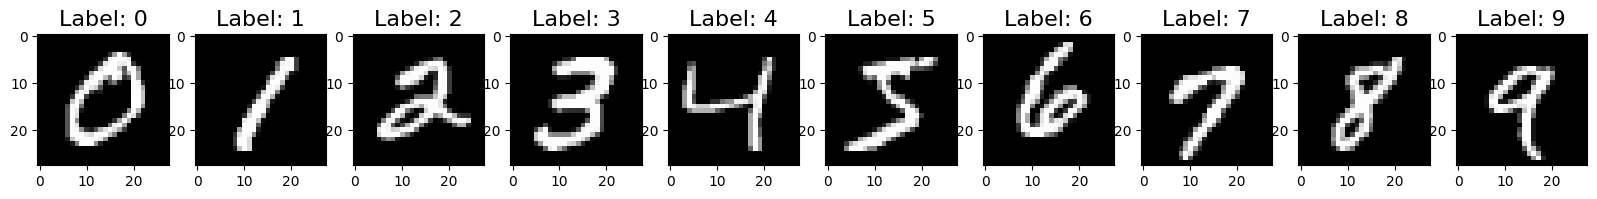

In [74]:
num_classes = 10
_, ax = plt.subplots(1, num_classes, figsize = (20, 20))
for i in range(num_classes):
    sample = x_train[y_train == i][0]
    ax[i].imshow(sample, cmap = 'gray')
    ax[i].set_title(f'Label: {i}', fontsize = 16)

In [75]:
x_train.shape

(60000, 28, 28)

In [76]:
print("Original shape of x_train:", x_train.shape)
print("Original shape of x_test:", x_test.shape)

Original shape of x_train: (60000, 28, 28)
Original shape of x_test: (10000, 28, 28)


## Scaling Pixel Values

we scale the pixel vlaues to the range [0,1] for several reasons. Neural networks typically perform better with input data yhat is on a smaller scale, This helps is speeding up the training process since smaller values make the weight adjustment in the optimization algorithm less extreme, It also helps in preventing the model from getting stuck in local minima during training. Furthurmore scaling ensures that all input features (pixel values in this case) contribute equally to the distance computations in the learning process, thus avoiding bias towards features with larger scales.

## Flattening Images to 1D Arrays
In many machine learning models, including simple neural networks, the input data needs to be flat vector of features. By converting the 2D images matrices into 1D arrays, we transform the data into a format that neural network can work with. This is because the underlaying algorithms typically expect a single list of features for each input sample, and each pixel value in the image is treated as a separate feature. This step is essential for the model to process the input image data correctly.

In [77]:
x_train_NewScale = x_train/255
x_test_NewScale = x_test/255

print(x_train_NewScale)
print(x_test_NewScale)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]
[[[0. 0. 0

In [78]:
# Flatten the 2D image matrices into 1D arrays
x_train_flattened = x_train_NewScale.reshape(-1, 28*28)
x_test_flattened = x_test_NewScale.reshape(-1, 28*28)

# OR
#x_train_flattened = x_train_NewScale.reshape(len(x_train), 28*28)

print("Shape of x_train_flattened:", x_train_flattened.shape)
print("Shape of x_test_flattened:", x_test_flattened.shape)


Shape of x_train_flattened: (60000, 784)
Shape of x_test_flattened: (10000, 784)


In [79]:
print("First element of x_train_flattened:", x_train_flattened[0])

First element of x_train_flattened: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.      

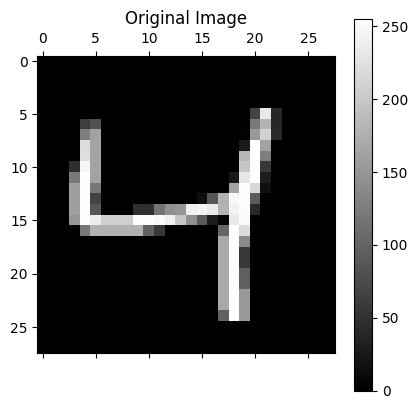

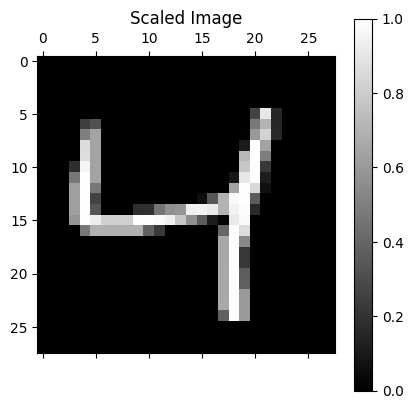

In [80]:
# Visualize an original image from the dataset
plt.matshow(x_train[2], cmap='gray')
plt.title('Original Image')
plt.colorbar()
plt.show()

# Visualize the corresponding scaled image
plt.matshow(x_train_NewScale[2], cmap='gray')
plt.title('Scaled Image')
plt.colorbar()
plt.show()


## create an initial Neural Network using Keras
We will initially use a simple network that only has an input layer and an output layer. The input layer will have 784 neurons (28 * 28 pixels in each image) and the outputlayer will have 10 neurons as we want to predict a digit, 0-9

In [81]:
model = keras.Sequential(
    [
        keras.layers.Dense(10, input_shape=(784,), activation='softmax')
    ]
)
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5


c:\Users\ammar\OneDrive\Desktop\MachineLearning\myVirtualEnv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.8088 - loss: 0.7296
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9153 - loss: 0.3054
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9201 - loss: 0.2805
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9236 - loss: 0.2758
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9249 - loss: 0.2678


## Prediction Generation:
How can you generate predictions from a trained neural network model using a test dataset? What function or method would you use?

In [82]:
#Prediction

prediction = model.predict(x_test_flattened)
print(prediction[0])


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[3.5149972e-06 3.2995169e-11 8.0154423e-06 2.4352993e-03 3.7508033e-07
 1.3224988e-05 2.3846455e-10 9.9730933e-01 1.3097603e-05 2.1716631e-04]


## Accessing Prediction Details
How would you access the prediction details for the second image in the test dataset? Which index would you use to retrieve this information from the predictions array?

In [83]:
second_image_prediction = prediction[1]
print(second_image_prediction)
# Determine the predicted class (index of the highest probability)
predicted_class_for_second_image = np.argmax(second_image_prediction)
print(f'Predicted class for the second image: {predicted_class_for_second_image}')

[3.8381980e-04 3.2395928e-06 9.9115634e-01 2.4735075e-04 3.8725265e-13
 2.8950810e-03 5.2250973e-03 8.5566649e-16 8.9175534e-05 1.9523023e-12]
Predicted class for the second image: 2


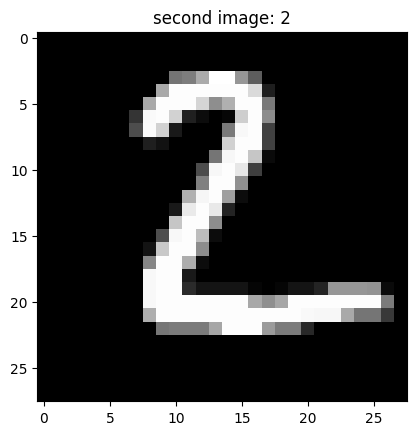

In [84]:
#Visualizing Test Data
#Which function would you use to visualize a specific test image, and what parameters might you need to provide to display it in grayscale?


import matplotlib.pyplot as plt
# Visualize the second test image
plt.imshow(x_test[1], cmap='gray')
plt.title(f'second image: {y_test[1]}')
plt.show()



In [85]:
#Comparing with Actual Labels
#How would you retrieve the actual label for the second image in the test dataset? Which index should you use to access this information?

actual_label_for_second_image = y_test[1]
print(f'The actual label for the second image is: {actual_label_for_second_image}')

The actual label for the second image is: 2


In [86]:
#Converting Predictions to Class Labels:
#How can you convert a list of prediction probabilities into class labels for each test image? 
predictions = model.predict(x_test_flattened)
#What Python technique or method would help you iterate over the predictions and extract the labels?
# ** predicted_labels = [np.argmax(predict) for predict in predictions] #if predictions is a list or if you need to handle non-NumPy data structures.
#OR 
predicted_labels = np.argmax(predictions, axis=1) #for efficiency and simplicity when working with standard 2D NumPy arrays.
print(predicted_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[7 2 1 ... 4 5 6]


In [87]:
#Examining Initial Predictions
#How would you access the first five predicted class labels from your converted predictions? Which part of the list would you slice to get this subset?

# Access the first five predicted class labels
first_five_labels = predicted_labels[:5]

print(first_five_labels)

[7 2 1 0 4]


In [88]:
print(predicted_labels[:10])
print(',' .join(str(c) for c in y_test[:10]))

[7 2 1 0 4 1 4 9 6 9]
7,2,1,0,4,1,4,9,5,9


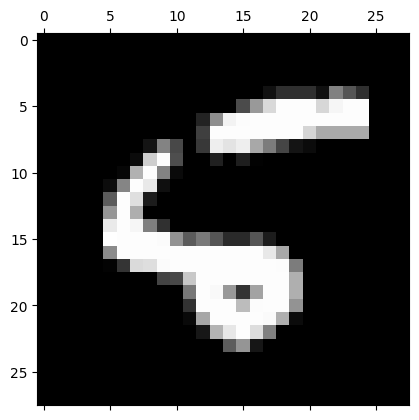

In [89]:
plt.matshow(x_test[8], cmap = 'gray')

In [90]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 959,    0,    2,    2,    0,    4,   10,    2,    1,    0],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   5,    9,  927,   14,    9,    3,   14,   11,   37,    3],
       [   3,    0,   19,  926,    0,   17,    3,   14,   22,    6],
       [   1,    1,    3,    1,  919,    0,   11,    4,    9,   33],
       [   8,    3,    2,   38,   11,  761,   20,   10,   31,    8],
       [   7,    3,    4,    1,    7,    9,  924,    2,    1,    0],
       [   1,    5,   22,    5,    7,    0,    0,  961,    2,   25],
       [   6,    7,    7,   19,    9,   22,   11,   15,  870,    8],
       [  11,    7,    1,    9,   37,    6,    0,   34,    4,  900]])>

Text(95.72222222222221, 0.5, 'Truth')

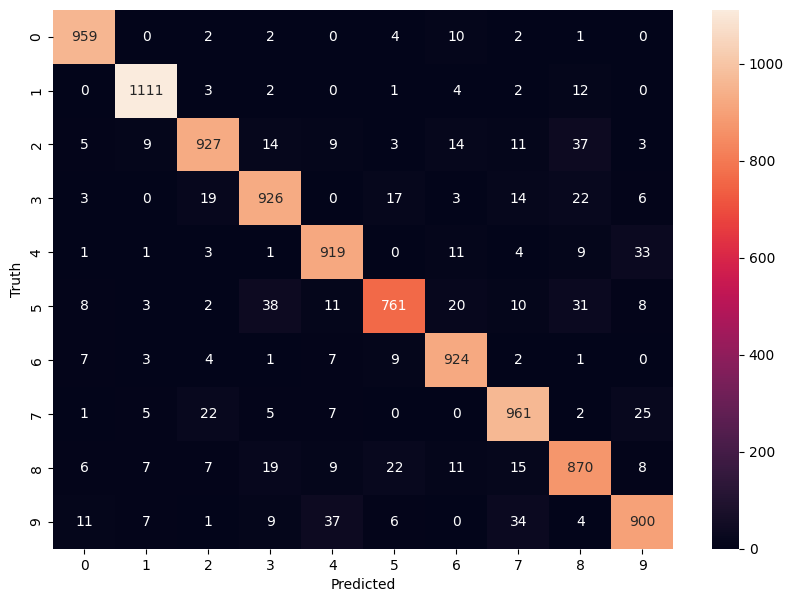

In [91]:
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [92]:
errors = (predicted_labels - y_test != 0)
errors

array([False, False, False, ..., False, False, False])

In [93]:
y_error_indexes = [i for i, error in enumerate (errors) if error]
len(y_error_indexes)

742

## Check a few random predictions

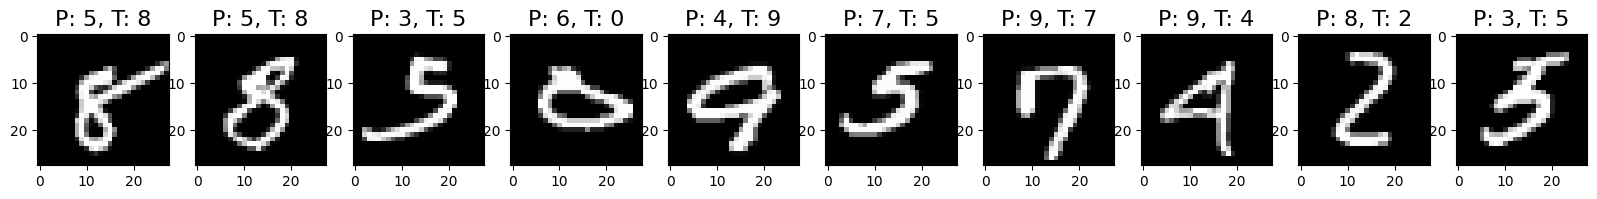

In [94]:
import random
idx_to_check = [y_error_indexes[random.randint(0, len(y_error_indexes)-1)] for _ in range(10)]

num_classes = 10
_, ax = plt.subplots(1, num_classes, figsize = (20,20)) # create a figure and set of subplots with 'num_classes' number of columns each subplot size is 20, 20 

for i, idx in enumerate(idx_to_check): #iterate through the list 'idx_to_check' with index and values.
    sample = x_test[idx] # extracts the test sample corresponding to the current index.
    predicted_values = predicted_labels[idx] # Retrives the predicted values from the current test
    true_value = y_test[idx] # Retrives the true vlaue from the current test
    ax[i].imshow(sample, cmap = 'gray') #Display the test sample in the i-th subplot with a grayscale colormap
    ax[i].set_title(f'P: {predicted_values}, T: {true_value}', fontsize = 16) # set the title for i-th subplot with predicted value and the true claue with fomt size 16

add a hidden layer to our model and see if that improves the accuracy.

In [95]:
model2 = keras.Sequential(
    [
        keras.layers.Dense(200, input_shape=(784,), activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ]
)
model2.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model2.fit(x_train_flattened, y_train, epochs=10)

c:\Users\ammar\OneDrive\Desktop\MachineLearning\myVirtualEnv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8910 - loss: 0.3853
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9691 - loss: 0.1049
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9791 - loss: 0.0670
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9845 - loss: 0.0481
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9897 - loss: 0.0321
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9919 - loss: 0.0260
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9942 - loss: 0.0196
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9957 - loss: 0.0140
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9963 - loss: 0.0122
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9971 - loss: 0.0095


In [96]:
y_predicted2 = model2.predict(x_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [103]:
predicted_labels2 = [np.argmax(i) for i in y_predicted2]

In [104]:
cm2 = tf.math.confusion_matrix(labels=y_test, predictions=predicted_labels2)

Text(95.72222222222221, 0.5, 'Truth')

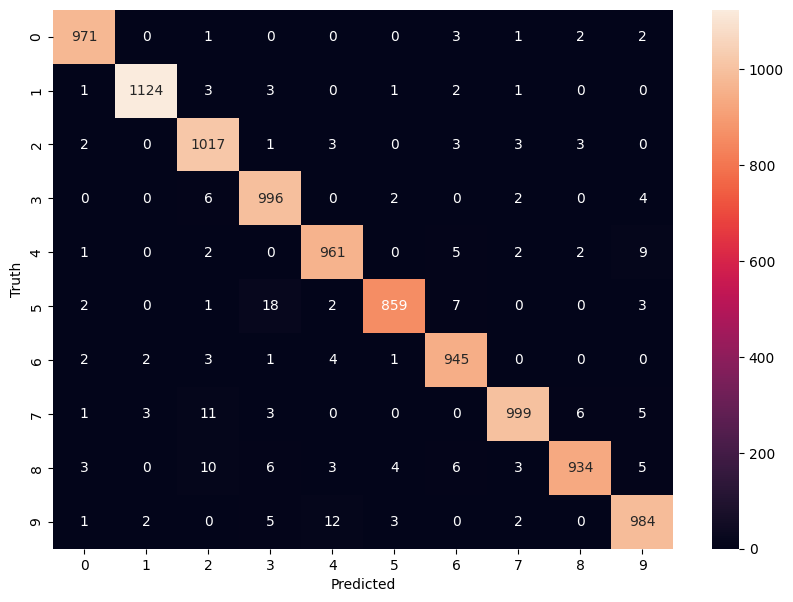

In [106]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm2, annot=True, fmt='0')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [107]:
errors2 = (predicted_labels2 - y_test != 0)
y_error_indexes2 = [i for i, error in enumerate (errors2) if error]
len(y_error_indexes2)

210

c:\Users\ammar\OneDrive\Desktop\MachineLearning\myVirtualEnv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8374 - loss: 0.5505
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9532 - loss: 0.1537
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9725 - loss: 0.0906
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9807 - loss: 0.0642
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9859 - loss: 0.0438
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9900 - loss: 0.0319
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9910 - loss: 0.0260
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9946 - loss: 0.0171
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9954 - loss: 0.0150
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9956 - loss: 0.0129
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


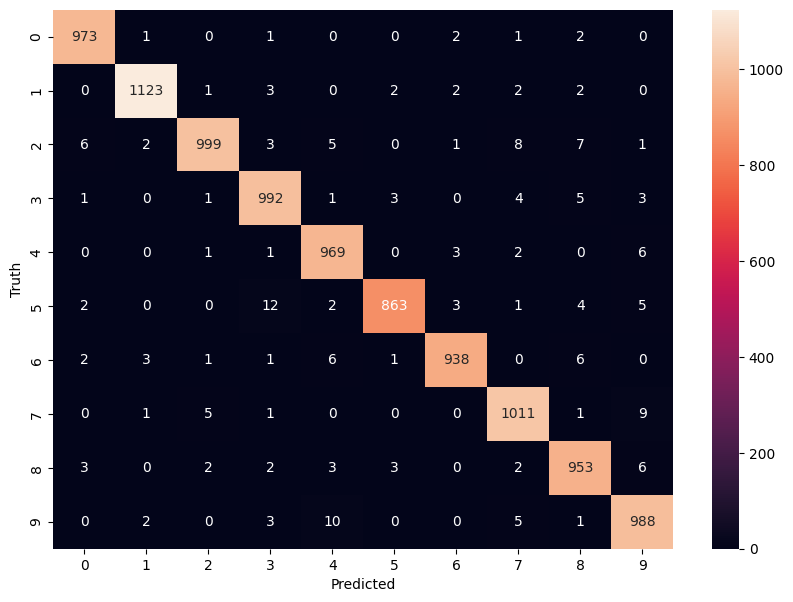

Errors in Model 3: 191


In [122]:


# Define Model 3
model3 = keras.Sequential(
    [
        keras.layers.Dense(350, input_shape=(784,), activation='sigmoid'),
        keras.layers.Dense(200, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ]
)

# Compile the model
model3.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
model3.fit(x_train_flattened, y_train, epochs=10)

# Predict on the test set
y_predicted3 = model3.predict(x_test_flattened)
predicted_labels3 = [np.argmax(i) for i in y_predicted3]

# Create confusion matrix
cm3 = tf.math.confusion_matrix(labels=y_test, predictions=predicted_labels3)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm3, annot=True, fmt='0')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# Calculate the number of errors
errors3 = (predicted_labels3 - y_test != 0)
y_error_indexes3 = [i for i, error in enumerate(errors3) if error]
num_errors3 = len(y_error_indexes3)

print(f'Errors in Model 3: {num_errors3}')
